In [1]:
import pandas as pd
from utilities.conversions import Conversions as con
from core.TrajectoryDF import NumPandasTraj as TrajDF
from preprocessing.interpolation import Interpolation as ip
import utilities.constants as const

In [2]:
%%time
"""
    1. Reading the atlantic dataset, cleaning it up and then
       converting it to NumPandasTraj.
    2. It is to be noted that apart from reading the dataset,
       before converting to NumPandasTraj, the dataframe needs
       some cleanup as the Time format provided in the dataframe
       needs to be first converted into a library supported time
       format. Also, the format of the coordinates need to be
       converted to library supported format before converting'
       it to NumPandasTraj.
    3. Also, lets, print the first 5 points of the dataset to
      see how the dataframe looks.
"""
atlantic = pd.read_csv('./data/atlantic.csv')
atlantic = con.convert_directions_to_degree_lat_lon(atlantic, 'Latitude',"Longitude")
def convert_to_datetime(row):
        this_date = '{}-{}-{}'.format(str(row['Date'])[0:4], str(row['Date'])[4:6], str(row['Date'])[6:])
        this_time = '{:02d}:{:02d}:00'.format(int(row['Time']/100), int(str(row['Time'])[-2:]))
        return '{} {}'.format(this_date, this_time)
atlantic['DateTime'] = atlantic.apply(convert_to_datetime, axis=1)
atlantic_df = TrajDF(atlantic,
                latitude='Latitude',
                longitude='Longitude',
                datetime='DateTime',
                traj_id='ID',
                rest_of_columns=[])
atlantic_df.head()

CPU times: user 7.65 s, sys: 75.7 ms, total: 7.72 s
Wall time: 7.72 s


Name      Date  Time Event  \
traj_id  DateTime                                                         
AL011851 1851-06-25 00:00:00              UNNAMED  18510625     0         
         1851-06-25 06:00:00              UNNAMED  18510625   600         
         1851-06-25 12:00:00              UNNAMED  18510625  1200         
         1851-06-25 18:00:00              UNNAMED  18510625  1800         
         1851-06-25 21:00:00              UNNAMED  18510625  2100     L   

                             Status   lat   lon  Maximum Wind  \
traj_id  DateTime                                               
AL011851 1851-06-25 00:00:00     HU  28.0 -94.8            80   
         1851-06-25 06:00:00     HU  28.0 -95.4            80   
         1851-06-25 12:00:00     HU  28.0 -96.0            80   
         1851-06-25 18:00:00     HU  28.1 -96.5            80   
         1851-06-25 21:00:00     HU  28.2 -96.8            80   

                              Minimum Pressure  Low Wind NE  ...  Low Wind SW  \
traj_id  DateTime                                            ...                
AL011851 1851-06-25 00:00:00              -999         -999  ...         -999   
         1851-06-25 06:00:00              -999         -999  ...         -999   
         1851-06-25 12:00:00              -999         -999  ...         -999   
         1851-06-25 18:00:00              -999         -999  ...         -999   
         1851-06-25 21:00:00              -999         -999  ...         -999   

                              Low Wind NW  Moderate Wind NE  Moderate Wind SE  \
traj_id  DateTime                                                               
AL011851 1851-06-25 00:00:00         -999              -999              -999   
         1851-06-25 06:00:00         -999              -999              -999   
         1851-06-25 12:00:00         -999              -999              -999   
         1851-06-25 18:00:00         -999              -999              -999   
         1851-06-25 21:00:00         -999              -999              -999   

                              Moderate Wind SW  Moderate Wind NW  \
traj_id  DateTime                                                  
AL011851 1851-06-25 00:00:00              -999              -999   
         1851-06-25 06:00:00              -999              -999   
         1851-06-25 12:00:00              -999              -999   
         1851-06-25 18:00:00              -999              -999   
         1851-06-25 21:00:00              -999              -999   

                              High Wind NE  High Wind SE  High Wind SW  \
traj_id  DateTime                                                        
AL011851 1851-06-25 00:00:00          -999          -999          -999   
         1851-06-25 06:00:00          -999          -999          -999   
         1851-06-25 12:00:00          -999          -999          -999   
         1851-06-25 18:00:00          -999          -999          -999   
         1851-06-25 21:00:00          -999          -999          -999   

                              High Wind NW  
traj_id  DateTime                           
AL011851 1851-06-25 00:00:00          -999  
         1851-06-25 06:00:00          -999  
         1851-06-25 12:00:00          -999  
         1851-06-25 18:00:00          -999  
         1851-06-25 21:00:00          -999  

[5 rows x 21 columns]

In [3]:
%%time

# Here, Interpolate the original atlantic hurricane dataset
# using linear interpolation and then show the difference in
# the number of points to see how the dataframe's trajectories
# have been interpolated.

linear_ip_atlantic = ip.interpolate_position(dataframe=atlantic_df,
                                             time_jump=3600*4)
print(f"Original DF length: {len(atlantic_df)}")
print(f"Linear Original DF length: {len(linear_ip_atlantic)}")

Original DF length: 49105
Linear Original DF length: 95106
CPU times: user 184 ms, sys: 104 ms, total: 288 ms
Wall time: 24.9 s


In [4]:
%%time

# Here, we will filter out a single trajectory from the atlantic
# dataset and check how many of the trajectory's points have
# time jump greater than what the examples are using to interpolate

small_atlantic = atlantic_df.reset_index().loc[atlantic_df.reset_index()[const.TRAJECTORY_ID] == 'AL062010'][[const.TRAJECTORY_ID, const.DateTime, const.LAT, const.LONG]]
time_del = small_atlantic.reset_index()[const.DateTime].diff().dt.total_seconds()
print((time_del > 3600*4).value_counts())

True     50
False     1
Name: DateTime, dtype: int64
CPU times: user 15.6 ms, sys: 7.89 ms, total: 23.5 ms
Wall time: 22.3 ms


In [5]:
%%time

# Now, on the smaller dataframe containing only a single
# trajectory from the original dataframe, interpolate the
# trajectory using linear interpolation.

small_linear_atlantic = ip.interpolate_position(small_atlantic,
                                                time_jump=3600*4,
                                                ip_type='linear')

CPU times: user 13.8 ms, sys: 7.95 ms, total: 21.8 ms
Wall time: 248 ms


Text(0.5, 1.0, 'Linear')

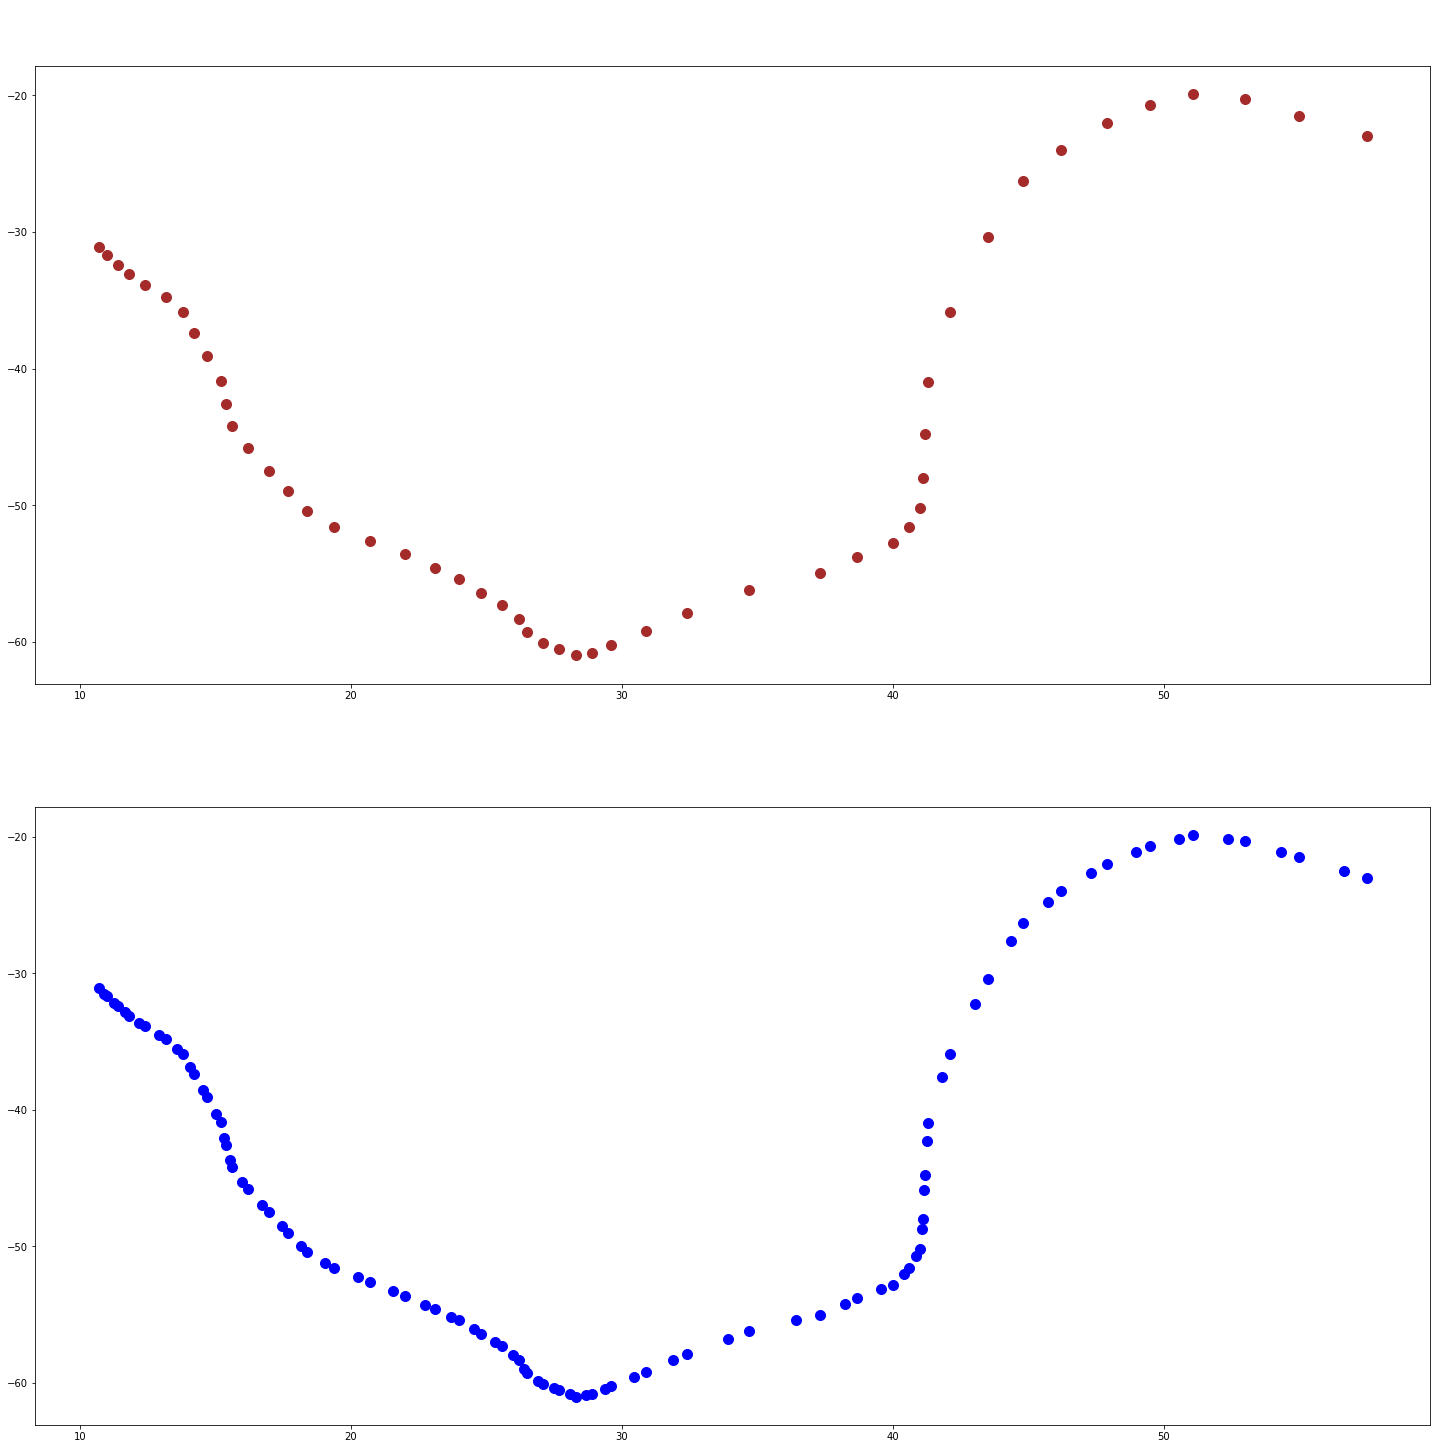

In [6]:
import  matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(25, 25))
axes[0].scatter(small_atlantic[const.LAT],
                small_atlantic[const.LONG],
                s=100, color='brown')
axes[0].set_title('Original', fontsize=60, color='White')
axes[1].scatter(small_linear_atlantic[const.LAT],
                small_linear_atlantic[const.LONG],
                s=100, color='blue')
axes[1].set_title('Linear', fontsize=60, color='White')

In [7]:
# Reading the gulls dataset and converting to NumPandasTraj.
# Also, lets, print the first 5 points of the dataset to
# see how the dataframe looks.
gulls = pd.read_csv('./data/gulls.csv')
gulls_df = TrajDF(gulls,
                latitude='location-lat',
                longitude='location-long',
                datetime='timestamp',
                traj_id='tag-local-identifier',
                rest_of_columns=[])
gulls_df.head()

event-id  visible       lon       lat  \
traj_id DateTime                                                       
91732   2009-05-27 14:00:00  1082620685     True  24.58617  61.24783   
        2009-05-27 20:00:00  1082620686     True  24.58217  61.23267   
        2009-05-28 05:00:00  1082620687     True  24.53133  61.18833   
        2009-05-28 08:00:00  1082620688     True  24.58200  61.23283   
        2009-05-28 14:00:00  1082620689     True  24.58250  61.23267   

                            sensor-type individual-taxon-canonical-name  \
traj_id DateTime                                                          
91732   2009-05-27 14:00:00         gps                    Larus fuscus   
        2009-05-27 20:00:00         gps                    Larus fuscus   
        2009-05-28 05:00:00         gps                    Larus fuscus   
        2009-05-28 08:00:00         gps                    Larus fuscus   
        2009-05-28 14:00:00         gps                    Larus fuscus   

                            individual-local-identifier  \
traj_id DateTime                                          
91732   2009-05-27 14:00:00                      91732A   
        2009-05-27 20:00:00                      91732A   
        2009-05-28 05:00:00                      91732A   
        2009-05-28 08:00:00                      91732A   
        2009-05-28 14:00:00                      91732A   

                                                                    study-name  
traj_id DateTime                                                                
91732   2009-05-27 14:00:00  Navigation experiments in lesser black-backed ...  
        2009-05-27 20:00:00  Navigation experiments in lesser black-backed ...  
        2009-05-28 05:00:00  Navigation experiments in lesser black-backed ...  
        2009-05-28 08:00:00  Navigation experiments in lesser black-backed ...  
        2009-05-28 14:00:00  Navigation experiments in lesser black-backed ...

In [8]:
%%time

# Here, Interpolate the original seagulls dataset using linear
# interpolation and then show the difference in the number of
# points to see how the dataframe's trajectories have been
# interpolated.

linear_ip_gulls = ip.interpolate_position(dataframe=gulls_df,
                                 time_jump=3600*4)
print(f"Original DF length: {len(gulls_df)}")
print(f"Linear Original DF length: {len(linear_ip_gulls)}")

Original DF length: 89869
Linear Original DF length: 157775
CPU times: user 253 ms, sys: 92 ms, total: 345 ms
Wall time: 41.5 s


In [9]:
%%time

# Here, we will filter out a single trajectory from the sea-gulls
# dataset and check how many of the trajectory's points have
# time jump greater than what the examples are using to interpolate

small_gulls = gulls_df.reset_index().loc[gulls_df.reset_index()[const.TRAJECTORY_ID] == '91732'][[const.TRAJECTORY_ID, const.DateTime, const.LAT, const.LONG]]
time_del = small_gulls.reset_index()[const.DateTime].diff().dt.total_seconds()
print((time_del > 3600*4).value_counts())

True     1501
False     469
Name: DateTime, dtype: int64
CPU times: user 46.4 ms, sys: 0 ns, total: 46.4 ms
Wall time: 45.2 ms


In [10]:
%%time

# Now, on the smaller dataframe containing only a single
# trajectory from the original dataframe, interpolate the
# trajectory using linear interpolation.

small_linear_gulls = ip.interpolate_position(small_gulls,
                                            time_jump=3600*4,
                                            ip_type='linear')

CPU times: user 5.25 ms, sys: 27.6 ms, total: 32.8 ms
Wall time: 3.81 s


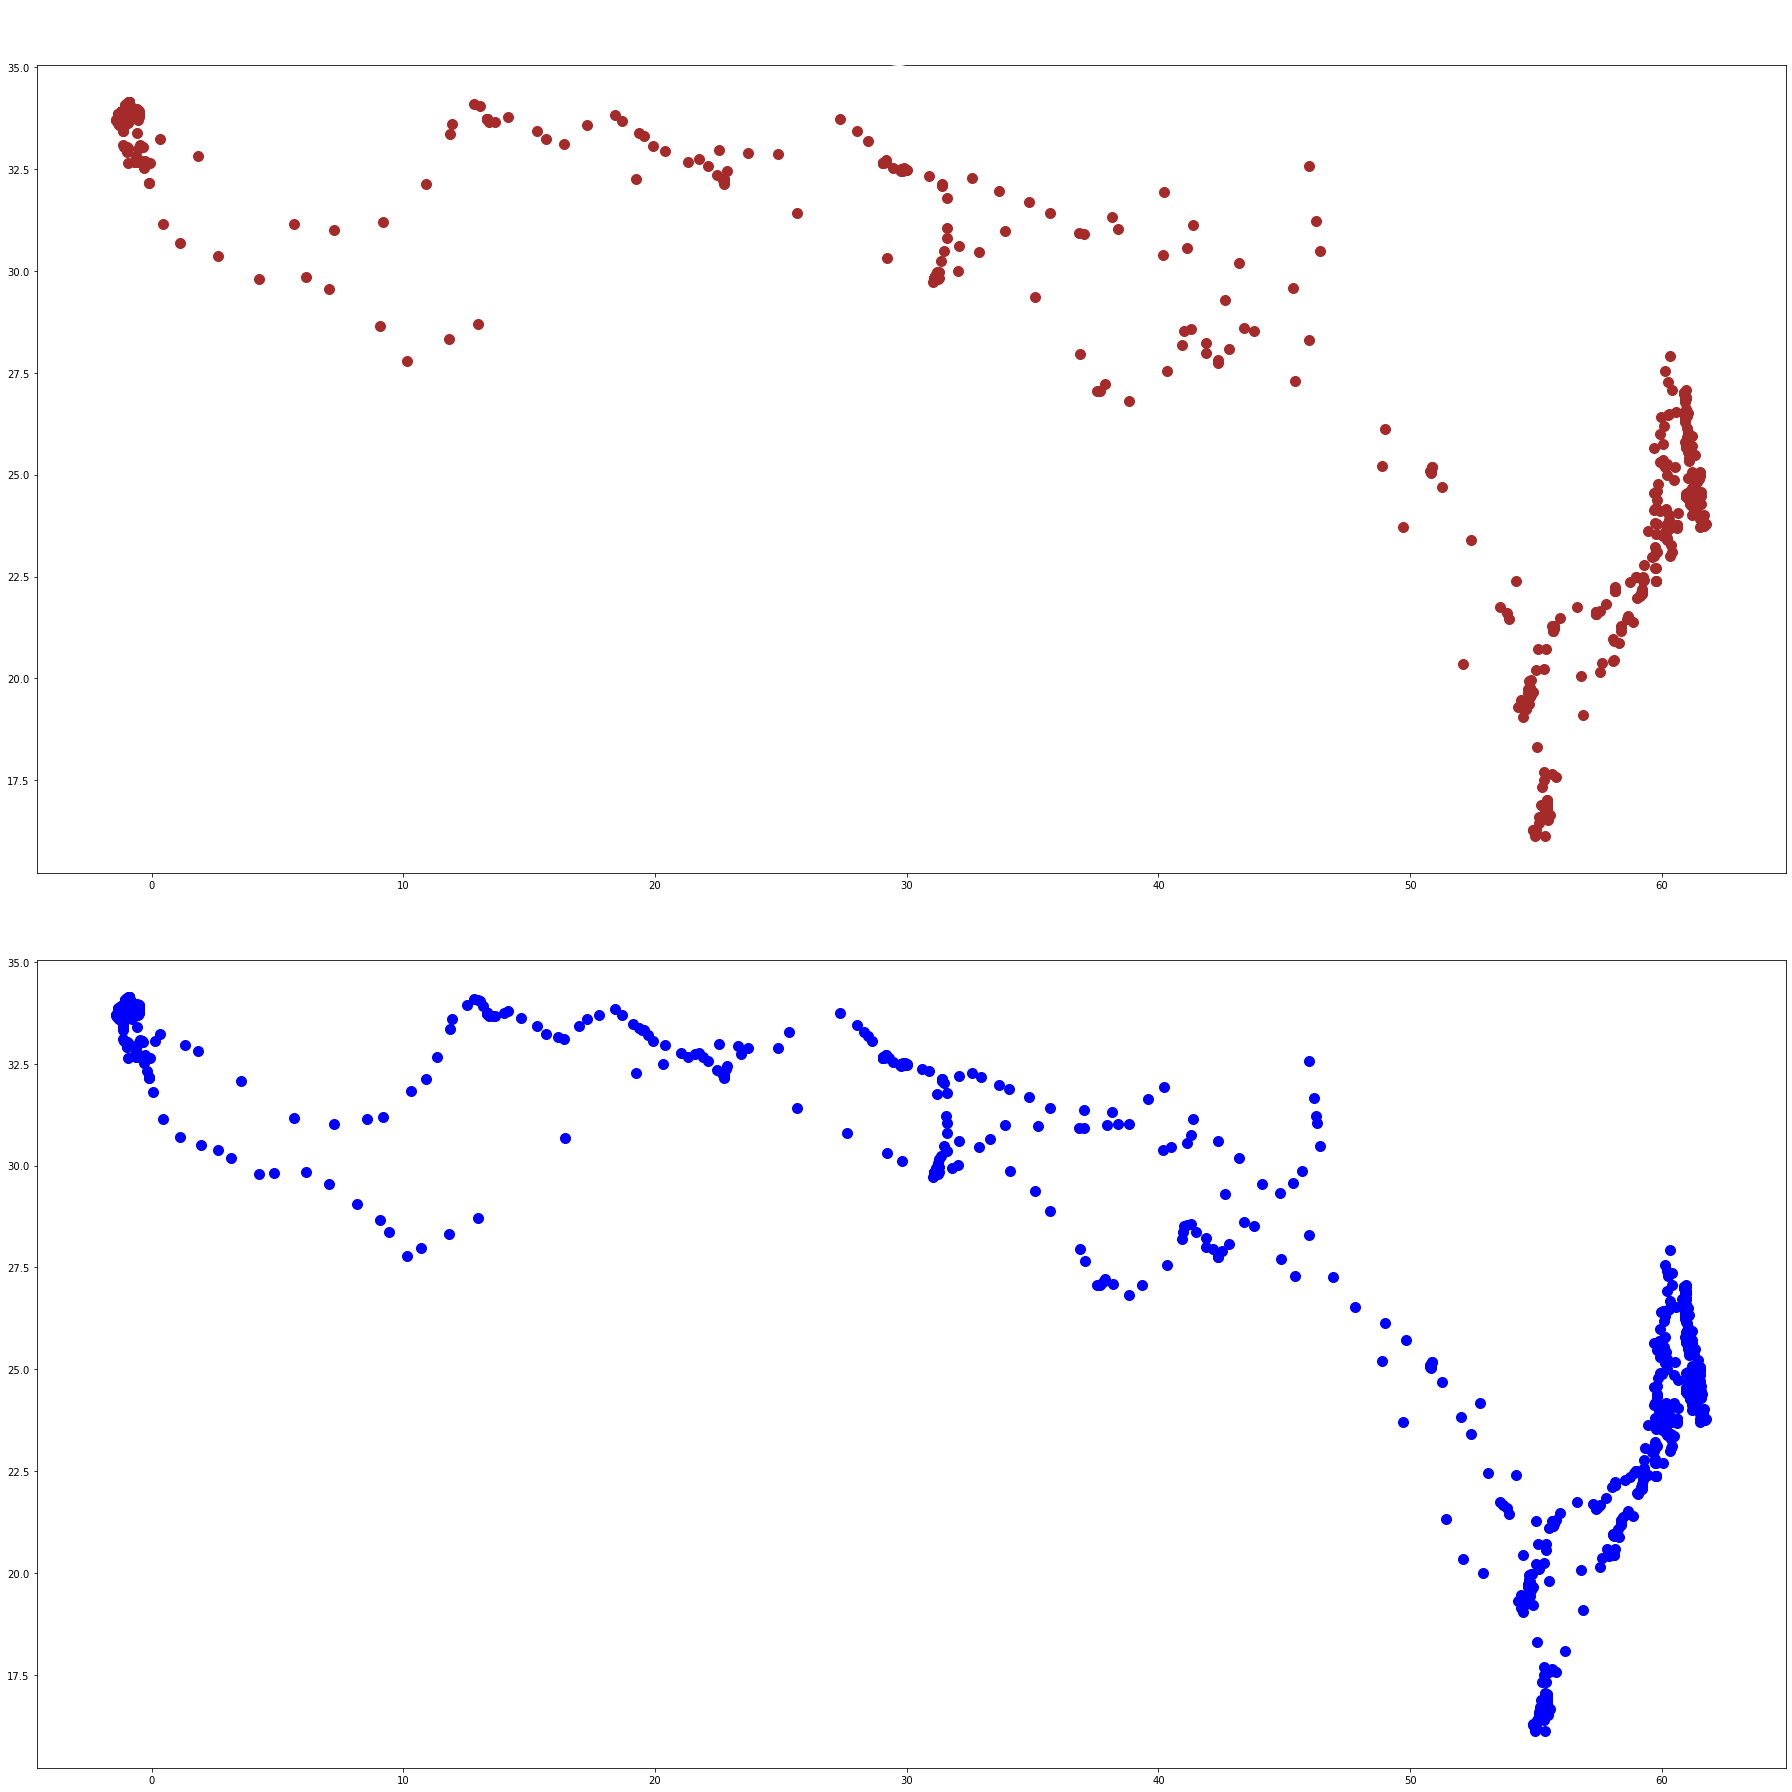

In [11]:
# Here, plot the scatter points of following 3 trajectories:
# 1. Original Small DF.
# 2. Linear-Interpolated Small DF.
# 3. Cubic-Interpolated Small DF.

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(25, 25))
axes[0].scatter(small_gulls[const.LAT],
                small_gulls[const.LONG],
                s=100, color='brown')
axes[0].set_title('Original', fontsize=60, color='White')
axes[1].scatter(small_linear_gulls[const.LAT],
                small_linear_gulls[const.LONG],
                s=100, color='blue')
axes[1].set_title('Linear', fontsize=60, color='White')
fig.tight_layout()
